In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

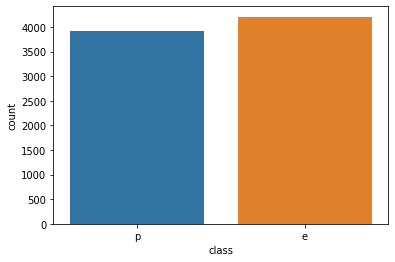

In [6]:
sns.countplot(data = df, x ='class')

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [11]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')

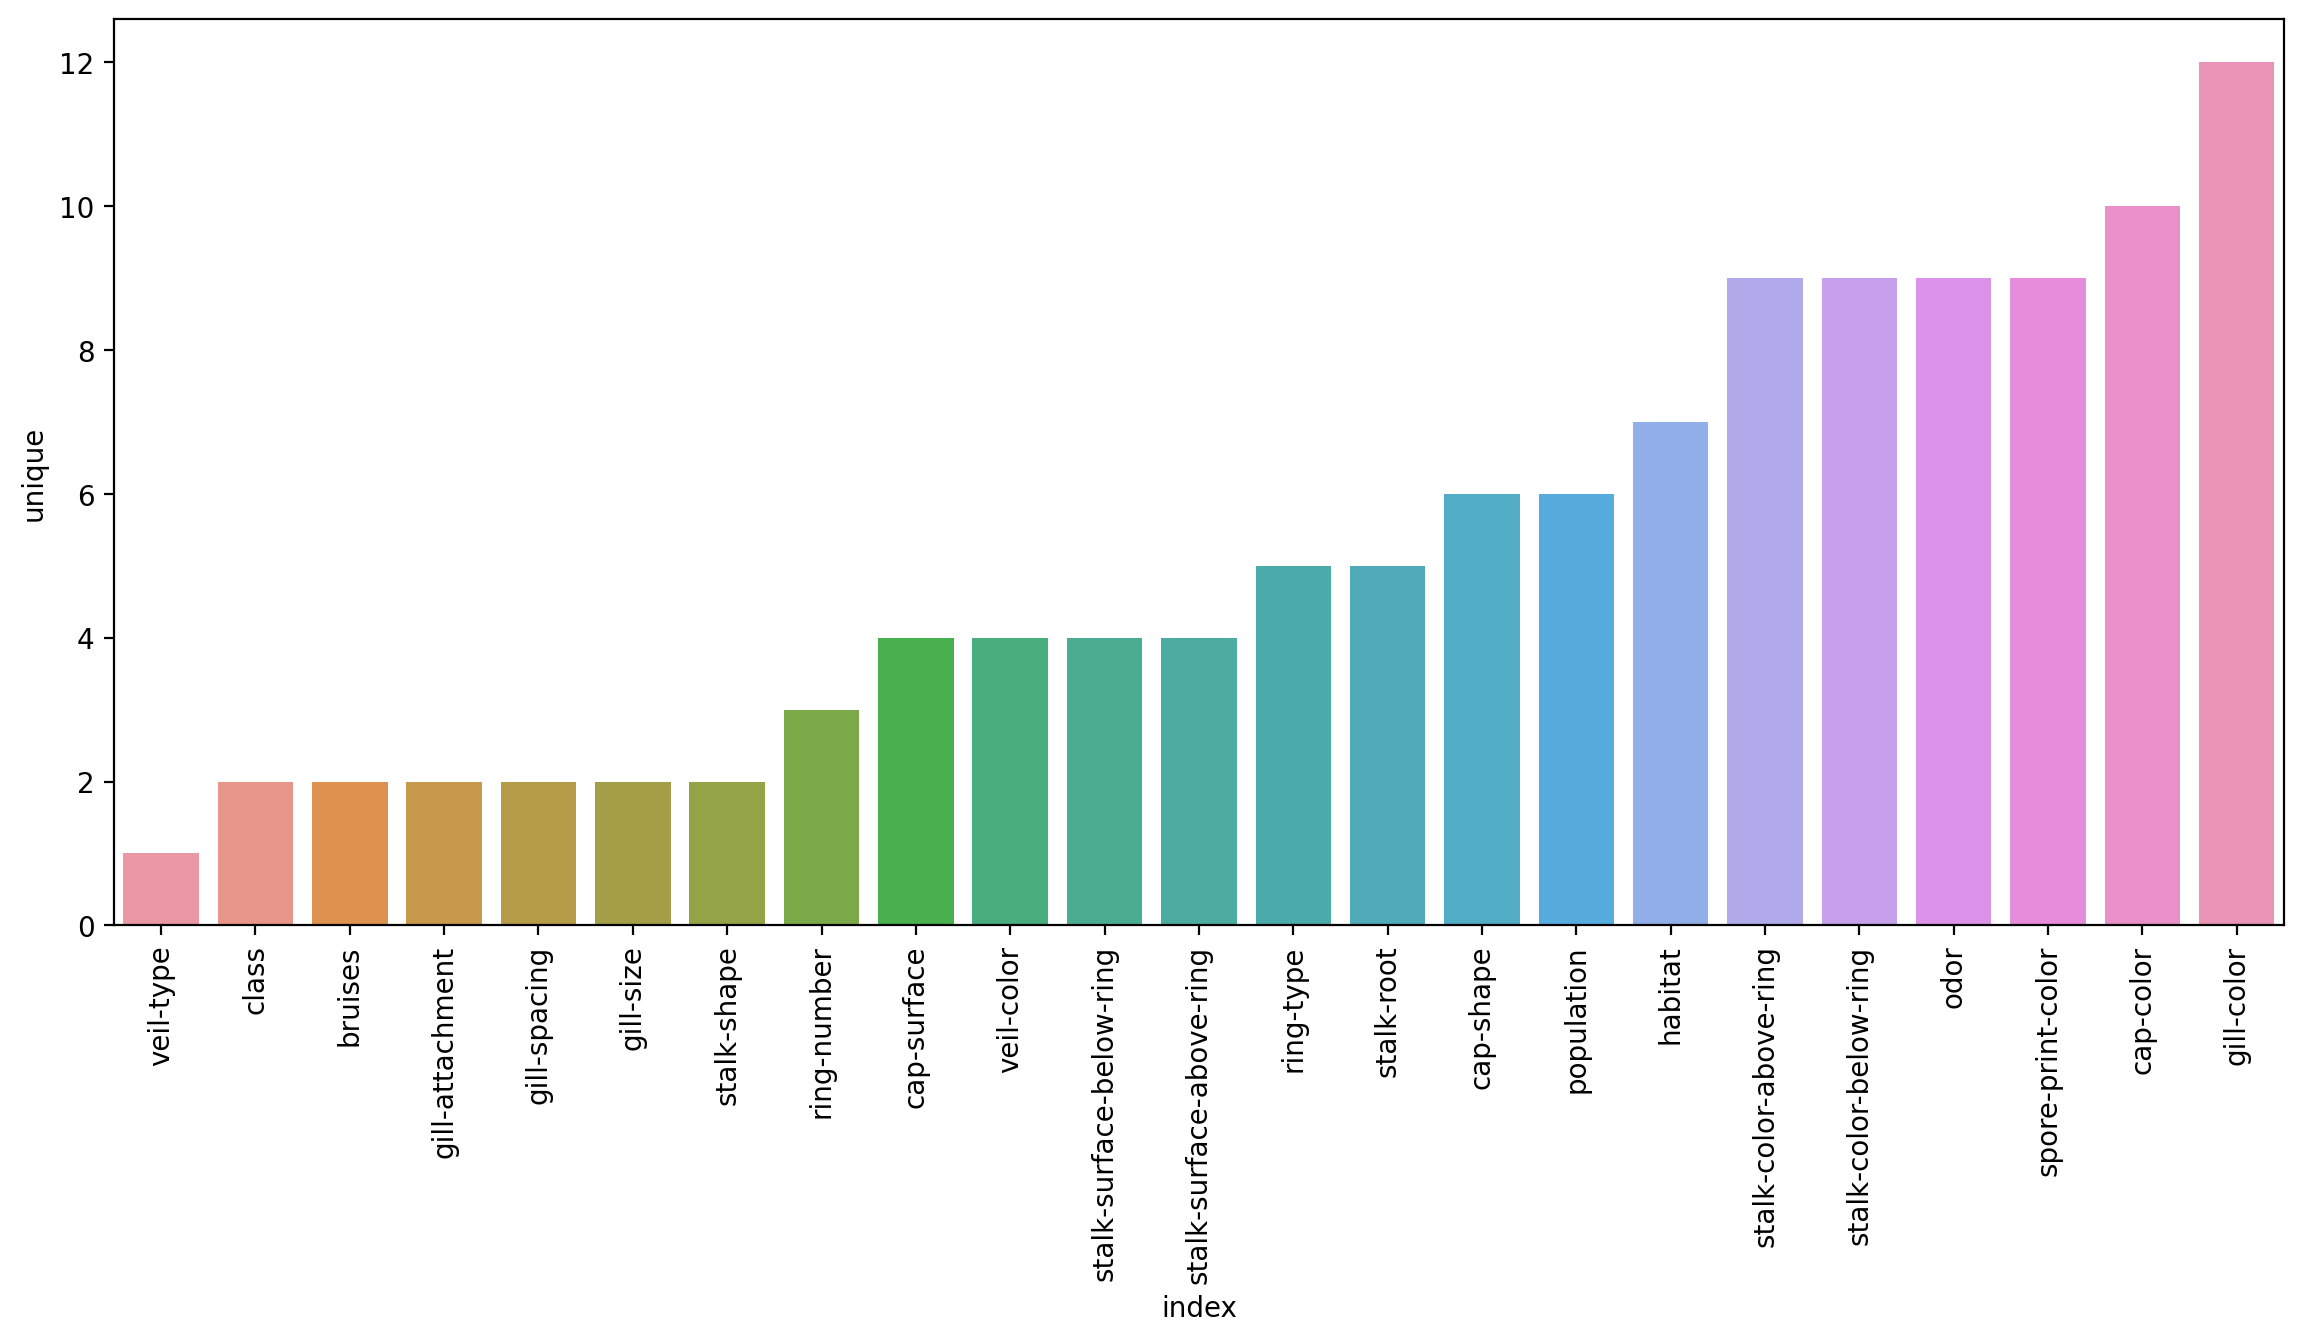

In [14]:
plt.figure(figsize = (14, 6), dpi = 200)
sns.barplot(data = feat_uni, x = 'index', y = 'unique')
plt.xticks(rotation = 90);

In [15]:
X = df.drop('class', axis = 1)

In [16]:
y = df['class']

In [22]:
X = pd.get_dummies(X, drop_first = True) # convert all categorical valuee to neumaric value

In [23]:
# X

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [27]:
from sklearn.ensemble import AdaBoostClassifier

In [28]:
model = AdaBoostClassifier(n_estimators=1)

In [29]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [30]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [31]:
predictions = model.predict(X_test)

In [32]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [34]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [35]:
model.feature_importances_.argmax()

22

In [37]:
X.columns[22]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

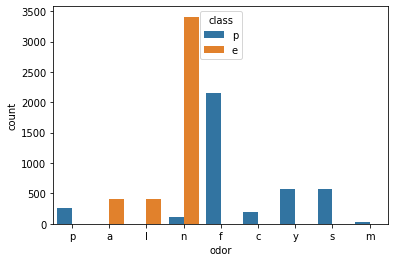

In [39]:
sns.countplot(data = df, x = 'odor', hue = 'class')

In [40]:
len(X.columns)

95

In [41]:
error_rates = []

for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    err = 1 - accuracy_score(y_test, preds)
    
    error_rates.append(err)

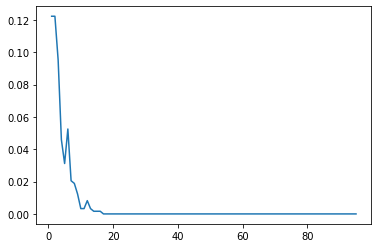

In [42]:
plt.plot(range(1, 96), error_rates)

In [45]:
feats = pd.DataFrame(index = X.columns, data = model.feature_importances_, columns = ['Importance'])

In [47]:
imp_feats = feats[feats['Importance']>0]

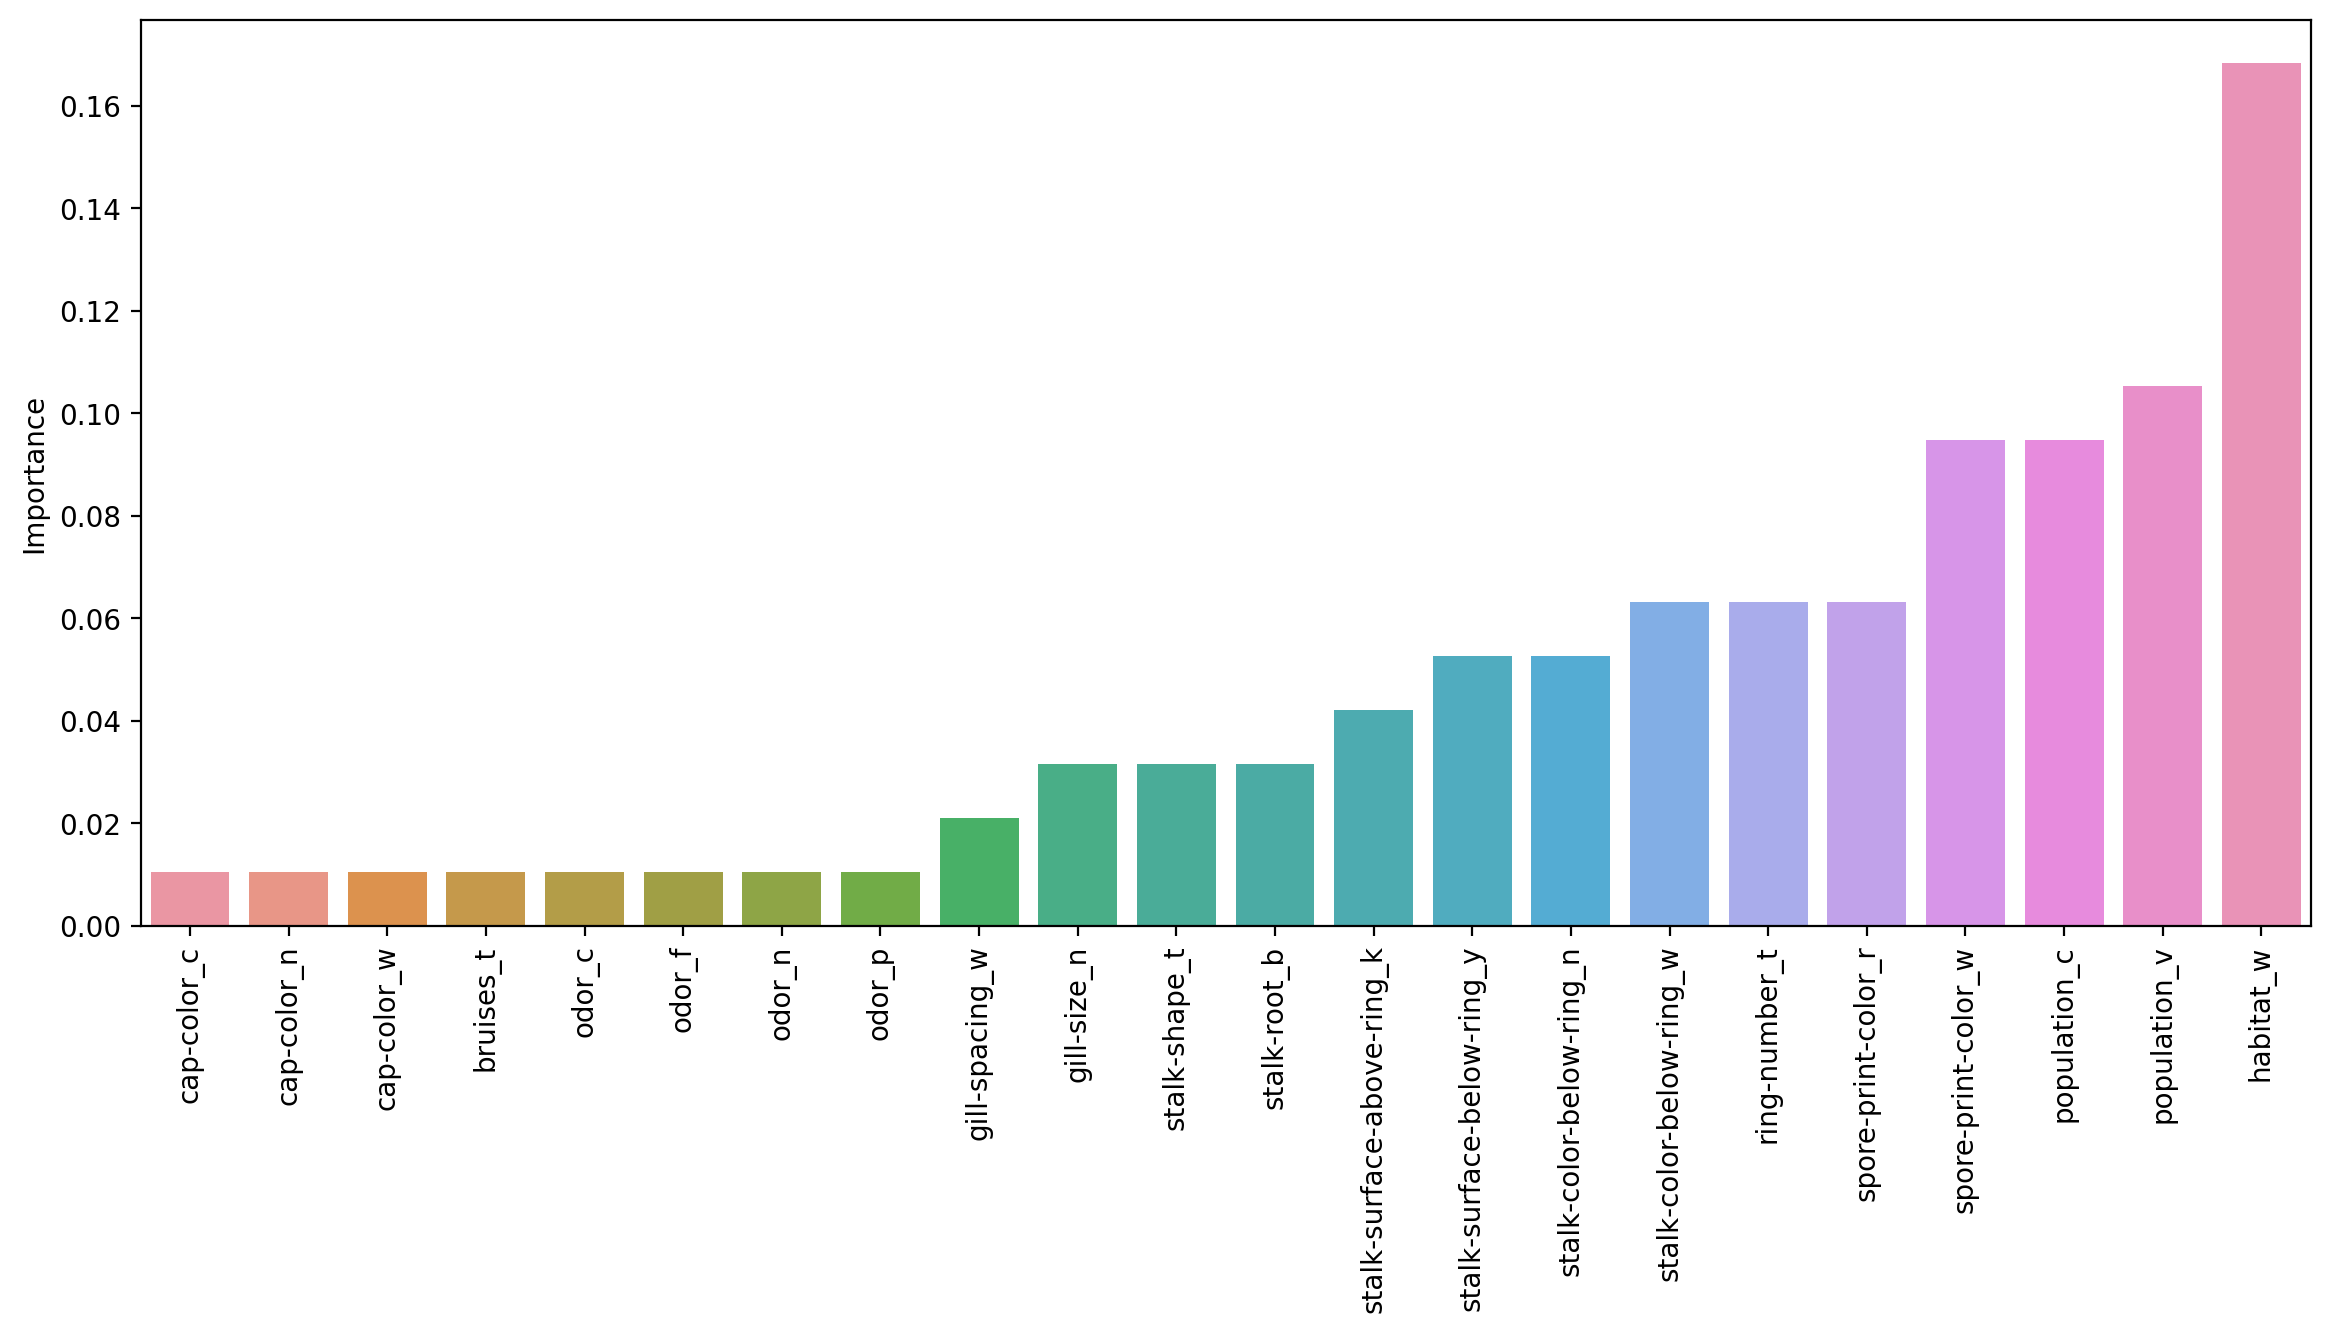

In [52]:
plt.figure(figsize = (14, 6), dpi = 200)
sns.barplot(data = imp_feats.sort_values('Importance'), x = imp_feats.index, y = 'Importance')
plt.xticks(rotation = 90);

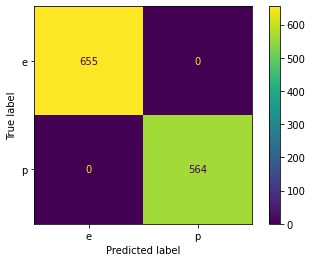

In [53]:
plot_confusion_matrix(model, X_test, y_test)